In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
data=pd.read_csv('./Cardetailsv3.csv')

In [126]:
data.head(40)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,5
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5


In [12]:
pd.set_option('display.float_format', '{:.0f}'.format)
data.describe()

,year,selling_price,km_driven,seats
count,8128,8128,8128,7907
mean,2014,638272,69820,5
std,4,806253,56551,1
min,1983,29999,1,2
25%,2011,254999,35000,5
50%,2015,450000,60000,5
75%,2017,675000,98000,5
max,2020,10000000,2360457,14


Text(0.5, 1.0, 'se logra identificar los datos faltantes y atipicos')

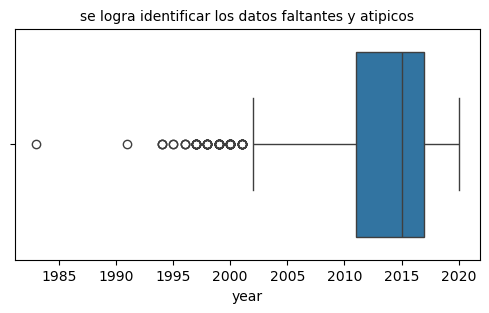

In [14]:
#gráfican los datos faltantes y atipicos en "year" que en si nos habla del modelo del vehiculo.
plt.figure(figsize=(6,3))
sns.boxplot(x=data['year'])
plt.title('se logra identificar los datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atípicos de los Acientos')

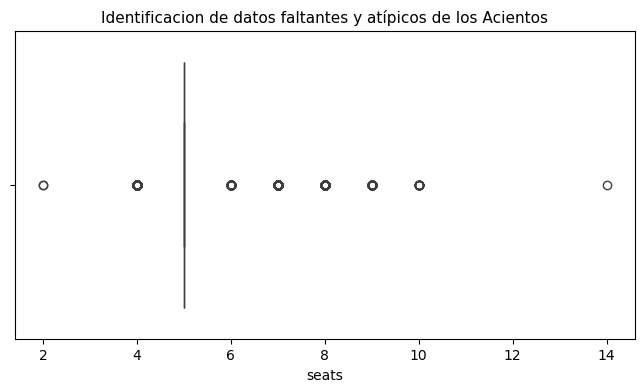

In [21]:
#gráfica de datos faltantes y atipicos en "seats"
plt.figure(figsize=(8,4))
sns.boxplot(x=data['seats'])
plt.title('Identificacion de datos faltantes y atípicos de los Acientos', fontsize=11)

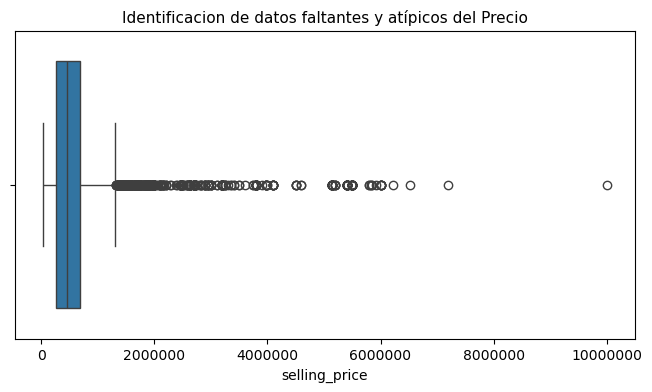

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['selling_price'])

# Establecer el formato de las etiquetas del eje x como números enteros
plt.ticklabel_format(style='plain', axis='x')

plt.title('Identificacion de datos faltantes y atípicos del Precio', fontsize=11)
plt.show()

In [25]:
#revision de datos faltantes
print("Cantidad de registros con 4 en Acientos:",data['seats'].isin([4]).sum())
print("Cantidad de registros con +50.000 KM Recorrido en KM Recorrido:", (data['km_driven'] > 50000).sum())
print("Cantidad de registros con -100.000 Precio de Venta en Precio de Venta:", (data['selling_price'] < 100000).sum())

Cantidad de registros con 4 en Acientos: 133
Cantidad de registros con +50.000 KM Recorrido en KM Recorrido: 4783
Cantidad de registros con -100.000 Precio de Venta en Precio de Venta: 328


In [27]:
data['seats']=data['seats'].replace(4,data['seats'].mean())

Text(0.5, 1.0, 'Identificacion de datos atípicos')

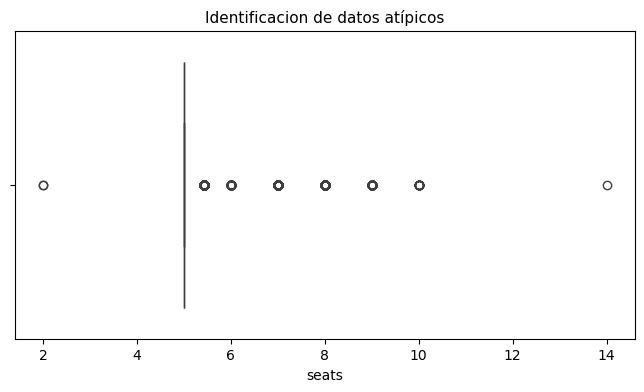

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['seats'])
plt.title('Identificacion de datos atípicos', fontsize=11)

In [39]:
#conteo de datos atipicos
minimo=2
maximo=8
total_atipicos=((data['seats']<minimo)|(data['seats']>maximo)).sum()
print("El total de datos atipicos para Acientos es {}".format(total_atipicos))

El total de datos atipicos para Acientos es 100


In [43]:
#filtrar los datos atipicos
data=data[(data['seats']<maximo)&(data['seats']>minimo)]

In [45]:
#validar si se removieron los datos atipicos
total_atipicos=((data['seats']<minimo)|(data['seats']>maximo)).sum()
print("El total de los datos atipicos para Acientos es {}".format(total_atipicos))

El total de los datos atipicos para Acientos es 0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7569 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7569 non-null   object 
 1   year           7569 non-null   int64  
 2   selling_price  7569 non-null   int64  
 3   km_driven      7569 non-null   int64  
 4   fuel           7569 non-null   object 
 5   seller_type    7569 non-null   object 
 6   transmission   7569 non-null   object 
 7   owner          7569 non-null   object 
 8   mileage        7569 non-null   object 
 9   engine         7569 non-null   object 
 10  max_power      7569 non-null   object 
 11  torque         7569 non-null   object 
 12  seats          7569 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 827.9+ KB


In [128]:
data['selling_price'].value_counts()

selling_price
300000    213
350000    193
600000    193
550000    187
450000    182
         ... 
94500       1
408000      1
654000      1
486000      1
746000      1
Name: count, Length: 652, dtype: int64

In [122]:
data[['selling_price']].head(30)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [130]:
#porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
X=data.drop ('selling_price',axis=1)
Y=data ['selling_price']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=0)

In [55]:
print(X_train)

                                  name  year  km_driven    fuel  \
1706            Mahindra XUV500 W6 2WD  2014      80000  Diesel   
5520  Volkswagen Polo 1.5 TDI Highline  2016      66000  Diesel   
7706                     Honda Jazz VX  2016      56494  Petrol   
6520          Maruti Wagon R VXI BS IV  2016      80000  Petrol   
6246                  Renault KWID RXT  2016      15000  Petrol   
...                                ...   ...        ...     ...   
5299        Tata Tiago 1.2 Revotron XT  2016      30000  Petrol   
3528              Maruti Swift AMT ZXI  2018      69779  Petrol   
1777                   Maruti Ritz VDi  2014      90000  Diesel   
2824          Maruti Vitara Brezza ZDi  2018      50000  Diesel   
2957  Hyundai Grand i10 1.2 Kappa Asta  2018      25000  Petrol   

           seller_type transmission         owner     mileage   engine  \
1706        Individual       Manual  Second Owner   15.1 kmpl  2179 CC   
5520            Dealer       Manual   First Own

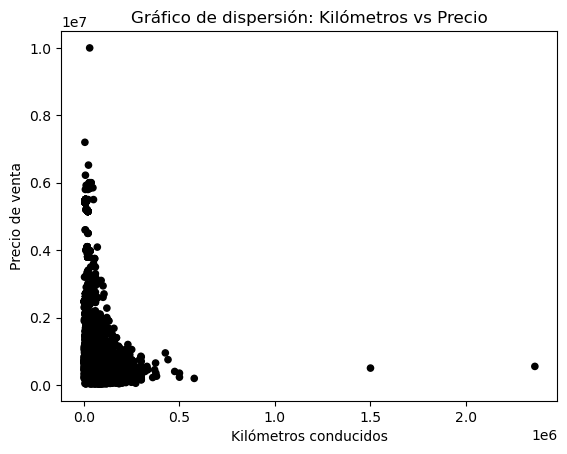

In [135]:
f1 = filtered_data['km_driven'].values
f2 = filtered_data['selling_price'].values
# Definir los colores que deseas asignar
colores = ['Blue', 'red']
tamanios=[20,100]

asignar = []
for index, row in filtered_data.iterrows():
    try:
        # Intentar convertir el valor de la columna 'name' a entero
        if int(row['name']) > 100000:
            asignar.append('black')
        else:
            asignar.append('red')
    except ValueError:
        asignar.append('black')  # Asignar un color por defecto
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('Kilómetros conducidos')
plt.ylabel('Precio de venta')
plt.title('Gráfico de dispersión: Kilómetros vs Precio')
plt.show()